In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "CoconutDiseases",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 6546 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names

In [6]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [9]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [10]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [11]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

In [13]:
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

e:\ESOFT CMPZ\Final Source Code\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.build(input_shape=input_shape)

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.7382 - loss: 0.5676 - val_accuracy: 0.7891 - val_loss: 0.5098
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.7721 - loss: 0.5408 - val_accuracy: 0.7891 - val_loss: 0.5171
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.7623 - loss: 0.5497 - val_accuracy: 0.7891 - val_loss: 0.5107
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.7725 - loss: 0.5364 - val_accuracy: 0.7891 - val_loss: 0.5125
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.7710 - loss: 0.5372 - val_accuracy: 0.7891 - val_loss: 0.5257
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.7666 - loss: 0.5444 - val_accuracy: 0.7891 - val_loss: 0.5138
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.7639 - loss: 0.5452 - val_accuracy: 0.7891 - val_loss: 0.5088
Epoch 8/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.7665 - loss: 0.5407 - val_accu

In [17]:
scores = model.evaluate(test_ds)

21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 320ms/step - accuracy: 0.7457 - loss: 0.5679


In [18]:
scores

[0.5663756132125854, 0.7470238208770752]

In [19]:
history

In [20]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 164}

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [22]:
type(history.history['loss'])

list

In [23]:
len(history.history['loss'])

50

In [24]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.5519083142280579,
 0.5489232540130615,
 0.5470025539398193,
 0.5446379780769348,
 0.5440508723258972]

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

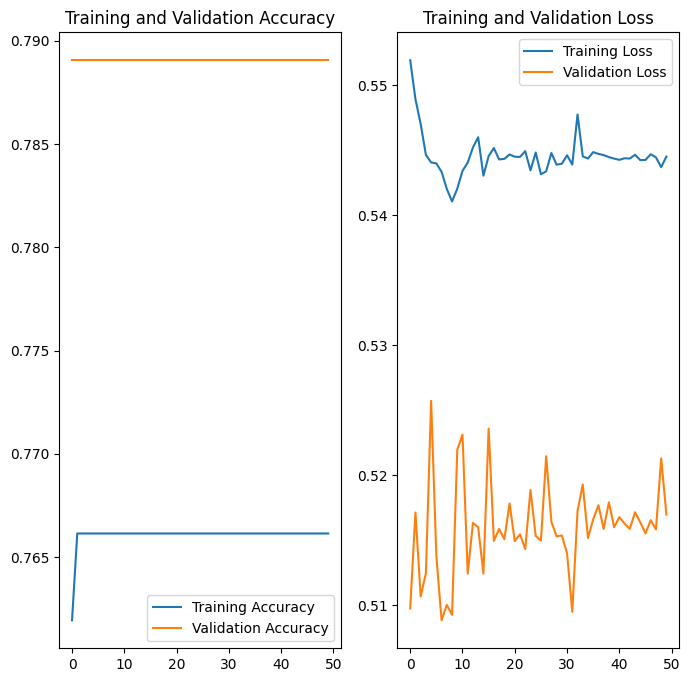

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Train
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
predicted label: Train


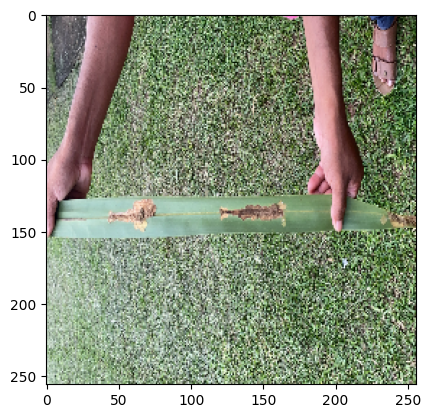

In [27]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


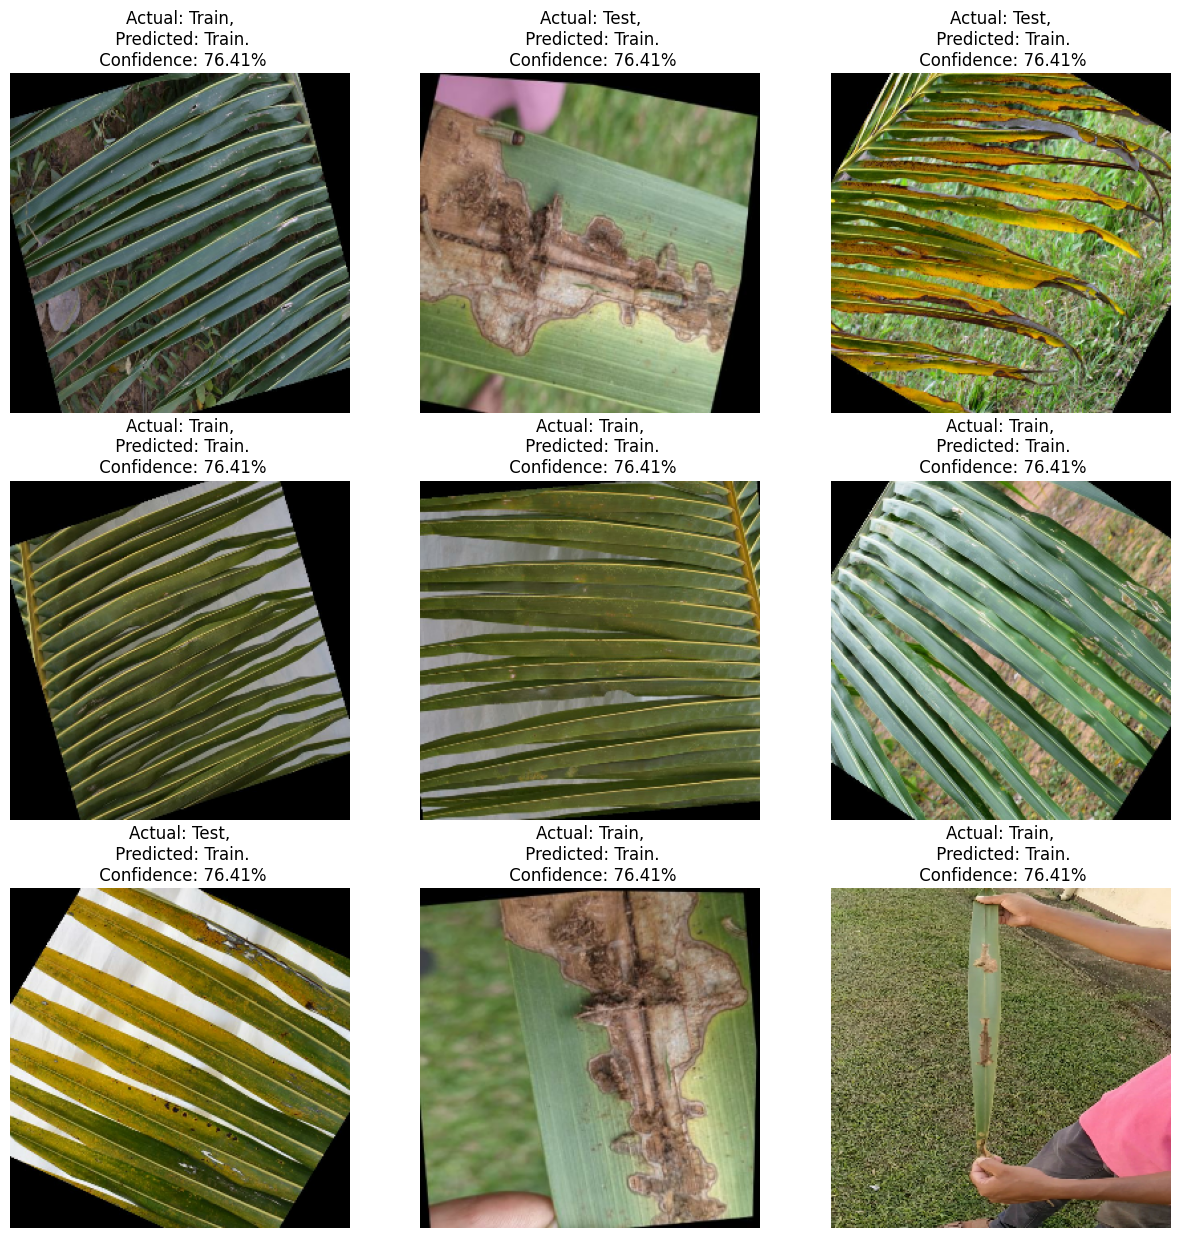

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [164]:
import os

In [165]:
models_dir = "../models"

In [166]:
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [179]:
# existing_models = [int(i) for i in os.listdir(models_dir)] if os.path.exists(models_dir) else []
# model_version = max(existing_models + [0]) + 1
if os.path.exists(models_dir):
    existing_models = []
    for filename in os.listdir(models_dir):
        try:
            # Extract the numeric part of the filename
            model_number = int(os.path.splitext(filename)[0])
            existing_models.append(model_number)
        except ValueError:
            # Ignore files that do not contain a valid integer
            continue
else:
    existing_models = []

# Determine the next model version
model_version = max(existing_models + [0]) + 1
print(model_version)

4


In [182]:
model.save(f"{models_dir}/{model_version}.keras")
print(f"{models_dir}/{model_version}.keras")

../models/4.keras


In [195]:
model.save("../mymodel.keras")

In [196]:
import tensorflow as tf

In [197]:
model = tf.keras.models.load_model("../mymodel.keras")
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.save('saved_model.keras')


In [199]:
model = tf.keras.models.load_model('saved_model.keras')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [200]:
@tf.function(input_signature=[tf.TensorSpec(shape=[None, *model.input_shape[1:]], dtype=tf.float32)])
def model_function(inputs):
    return model(inputs)

concrete_function = model_function.get_concrete_function()

In [201]:
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_function], trackable_obj=model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
try:
    tflite_model = converter.convert()
    # Save the TensorFlow Lite model
    with open("../saved_model.tflite", "wb") as f:
        f.write(tflite_model)
    print("Model conversion successful!")
except AttributeError as e:
    print(f"An error occurred: {e}")

Model conversion successful!
